In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cartopy
import cartopy.crs as ccrs
import lightningutil

In [ ]:
#files 

"""
metfields

/aosc/eos20/djallen/lightning/geos/twod/201907            cmap

GEOS_cape_hrly.UT.t201907.r180W-30W_50S-50N.nc       *    YlOrRd
GEOS_cldht_hrly.UT.t201907.r180W-30W_50S-50N.nc      *    copper  
GEOS_l_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc    *    
GEOS_mf_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc   *    ocean_r
GEOS_pblh_hrly.UT.t201907.r180W-30W_50S-50N.nc       *    tab20b , BuPu
GEOS_p_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc    *    PuRd_r
GEOS_p_ctop_hrly.UT.t201907.r180W-30W_50S-50N.nc     *    binary , plasma_r *cant have white
GEOS_precon_hrly.UT.t201907.r180W-30W_50S-50N.nc     *    cool
GEOS_pretot_hrly.UT.t201907.r180W-30W_50S-50N.nc     *    summer
GEOS_t_sfc_hrly.UT.t201907.r180W-30W_50S-50N.nc      *    turbo
GEOS_z_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc    *    pink

/aosc/eos20/djallen/lightning/geos/twod_440/201907

GEOS_cldfrac_conv_440_hrly.UT.t201907.r180W-30W_50S-50N.nc   *   viridis
GEOS_cldfrac_ls_440_hrly.UT.t201907.r180W-30W_50S-50N.nc     *   viridis
GEOS_cnv_mfc_440_hrly.UT.t201907.r180W-30W_50S-50N.nc        *   ocean_r
GEOS_iwc_440_hrly.UT.t201907.r180W-30W_50S-50N.nc            *   winter

lightning

/aosc/eos20/djallen/data/lightning/glm/2019

GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N.nc    *
GLMmax_hrly_count_g.nominalq.UT.t201907.r180W-30W_50S-50N.nc    *
GLMmax_hrly_energy_f.nominalq.UT.t201907.r180W-30W_50S-50N.nc   *
GLMmax_hrly_energy_g.nominalq.UT.t201907.r180W-30W_50S-50N.nc   *
"""
print()

# Counts 

In [2]:
directory = '/aosc/eos20/djallen/lightning/geos/twod/201907/'
filename = 'GEOS_z_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc'
ds_tmp = lightningutil.open_and_preprocess(directory+filename, lightningutil.variables)

directory = '/aosc/eos20/djallen/data/lightning/glm/2019/'
filename = 'GLMmax_hrly_count_g.nominalq.UT.t201907.r180W-30W_50S-50N.nc'
CS1_tmp = lightningutil.open_and_preprocess(directory+filename, lightningutil.variables)

filename = 'GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N.nc'
CS2_tmp = lightningutil.open_and_preprocess(directory+filename, lightningutil.variables)

In [9]:
CS1_tmp

<xarray.DataArray 'groups' (Latitudes: 200, Longitudes: 300, Datetime: 744)>
array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
...
        ...,
        [  0.,   0.,   0., ...,   0.,  94.,  66.],
        [  0.,   0.,   0., ...,   0.,   0.,  78.],
        [  0.,   0.,   0., ...,   0.,   0.,  24.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,  12.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,  15.],
        [  0.,   0.,   0., ...,   0.,   0., 103.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]], dtype=float32)
Coordinates:
  * Longitudes  (Longitudes) float32 -179.8 -179.2 -178.8 ... -30.75 -30.25
  * Latitudes   (Latitudes) float32 -49.75 -49.25 -48.75 ... 48.75 49.25 49.75
  * Datetime    (Datetime) datetime64[ns] 2019-07-01T01:00:00 ... 2019-08-01
Attributes:
    long_name:      Group count
    units:          Count 0.5x0.5 box-1 60min-1
    var_desc:       Count of GLM Groups
    missing_value:  nan

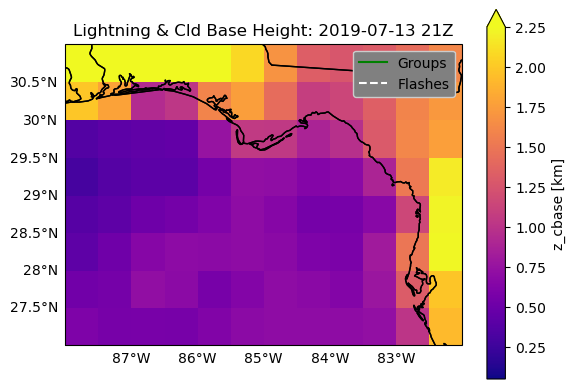

In [4]:
lightningutil.case_study_plotting(
    ds_tmp,
    CS1_tmp,
    CS2_tmp,
    lon_range=slice(-88,-82),
    lat_range=slice(27,31),  
    date_time='2019-07-06T18:00:00.000000000',
    vmin=0.05,
    vmax=2.25,
    cmap='plasma',
    cnt_levels_1=[8000,12000,16000,20000,24000,28000,32000,36000],  
    # 20,40,60,80,100 (15z), 250,500,750,1000,1500 (16z), 2000,4000,6000,8000,12000 (17z) 
    # 4000,8000,12000,16000,20000,24000 (18z), 4000,8000,12000,16000,20000,24000,28000,32000,36000 (19z) remove 4000 for 20/21
    color_1='green',
    legend_label_1="Groups",
    cnt_levels_2=[600,1000,1400,1800,2400,3000], 
    # 2,4,6,8,10 (15z), 10,50,100,150,200 (16z), 400,600,800,1000,1200 (17z), 600,1000,1400,1800,2200 (18z),
    # 600,1000,1400,1800,2400,3000(19-21z)
    color_2='white',
    legend_label_2="Flashes",
    cbar_label="z_cbase [km]",
    legend_facecolor='grey',
    fig_title='Lightning & Cld Base Height: 2019-07-13 21Z',
    #save_string= "/aosc/eos20/eevans15/p_cbase_plots/23zp_cbase.png"
                   )

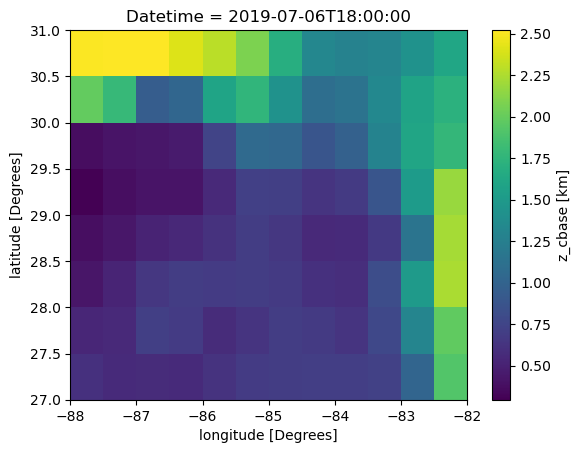

In [15]:
ds_tmp.sel(
     Latitudes=slice(27,31),
    Longitudes=slice(-88,-82),
    Datetime='2019-07-06T18:00:00.000000000',
    ).plot()

# Energy

In [ ]:
directory = '/aosc/eos20/djallen/lightning/geos/twod/201907/'
filename = 'GEOS_t_sfc_hrly.UT.t201907.r180W-30W_50S-50N.nc'
ds_tmp = lightningutil.open_and_preprocess(directory+filename, lightningutil.variables)

directory = '/aosc/eos20/djallen/data/lightning/glm/2019/'
filename = 'GLMmax_hrly_energy_g.nominalq.UT.t201907.r180W-30W_50S-50N.nc'
CS1_tmp = lightningutil.open_and_preprocess(directory+filename, lightningutil.variables)

filename = 'GLMmax_hrly_energy_f.nominalq.UT.t201907.r180W-30W_50S-50N.nc'
CS2_tmp = lightningutil.open_and_preprocess(directory+filename, lightningutil.variables)

In [ ]:
lightningutil.case_study_plotting(
    ds_tmp,
    CS1_tmp,
    CS2_tmp,
    lon_range=slice(-96,-86),
    lat_range=slice(30,37),  
    date_time='2019-07-16T12:00:00.000000000',
    vmin=290,
    vmax=315,
    cmap='turbo',
    cnt_levels_1=[10000,20000,30000,40000,50000,60000],  #(16z) add 1000,5000
    color_1='white',
    legend_label_1="Groups",
    cnt_levels_2=[10000,20000,30000,40000,50000,60000], 
    color_2='purple',
    legend_label_2="Flashes",
    cbar_label="t_sfc [K]",
    legend_facecolor='grey',
    fig_title='Energy and Sfc Temp: 2019-07-16 12Z',
    )